### LSE Data Analytics Online Career Accelerator

# Course 2: Data Analytics using Python

## Assignment: Diagnostic Analysis using Python

You’ll be working with real-world data to address a problem faced by the National Health Service (NHS). The analysis will require you to utilise Python to explore the available data, create visualisations to identify trends, and extract meaningful insights to inform decision-making. 

# Assignment activity 1

### Insert proof of your GitHub repository. This can be a link or screenshot showing your repo.

# My GitHub repository.
https://github.com/shiva21/LSE_DA_NHS_analysis

# Assignment activity 2

### Prepare your workstation

In [1]:
# Import the necessary libraries.
import pandas as pd
import numpy as np

# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import and sense-check the actual_duration.csv data set as ad.
ad = pd.read_csv('actual_duration.csv')

# View the DataFrame.
ad

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730
...,...,...,...,...,...,...,...,...
137788,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,31-60 Minutes,430
137789,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,21-30 Minutes,751
137790,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,16-20 Minutes,921
137791,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,11-15 Minutes,1439


In [3]:
# Determine whether there are missing values.
ad_na = ad[ad.isna().any(axis=1)]

print(f'Missing Values (rows, columns): {ad_na.shape}')

Missing Values (rows, columns): (0, 8)


In [4]:
# Determine the metadata of the data set.
print(f'Dimensions (rows, columns) : {ad.shape}')
print('\n')
print(f'dtype information:')
print(ad.dtypes)
print('\n')
print(f'Information:')
print(ad.info())

Dimensions (rows, columns) : (137793, 8)


dtype information:
sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object


Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   co

In [5]:
# Determine the descriptive statistics of the data set.
ad.describe()

,count_of_appointments
count,137793.000000
mean,1219.080011
std,1546.902956
min,1.000000
25%,194.000000
50%,696.000000
75%,1621.000000
max,15400.000000


In [6]:
# Import and sense-check the appointments_regional.csv data set as ar.
ar = pd.read_csv('appointments_regional.csv')

# View the DataFrame.
ar

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971
...,...,...,...,...,...,...,...
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


In [7]:
# Determine whether there are missing values.
ar_na = ar[ar.isna().any(axis=1)]

print(f'Missing Values (rows, columns): {ar_na.shape}')

# Appointment Status = 'Unknown'
unk_appt_status = ar[ar['appointment_status']
                     == 'Unknown']['appointment_status'].count()
print(f'Unknown Appointment Status: {unk_appt_status}')

# hcp_type = 'Unknown'
unk_hcp_type = ar[ar['hcp_type'] == 'Unknown']['hcp_type'].count()
print(f'Unknown HCP Type: {unk_appt_status}')

# Appointment Mode = 'Unknown'
unk_appt_mode = ar[ar['appointment_mode'] ==
                   'Unknown']['appointment_mode'].count()
print(f'Unknown Appointment Mode: {unk_appt_mode}')

Missing Values (rows, columns): (0, 7)
Unknown Appointment Status: 201324
Unknown HCP Type: 201324
Unknown Appointment Mode: 79147


In [8]:
# Determine the metadata of the data set.
print(ar.shape)
print(ar.dtypes)

(596821, 7)
icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object


In [9]:
# Determine the descriptive statistics of the data set.
ar.describe()

,count_of_appointments
count,596821.000000
mean,1244.601857
std,5856.887042
min,1.000000
25%,7.000000
50%,47.000000
75%,308.000000
max,211265.000000


In [10]:
# Import and sense-check the national_categories.xlsx data set as nc.
nc = pd.read_excel('national_categories.xlsx')

# View the DataFrame.
nc

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08
...,...,...,...,...,...,...,...,...
817389,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Unplanned Clinical Activity,12,2022-06
817390,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinics,4,2022-06
817391,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinical Procedure,92,2022-06
817392,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Routine,4,2022-06


In [11]:
# Determine whether there are missing values.
nc_na = nc[nc.isna().any(axis=1)]

print(f'Missing Values (rows, columns): {nc_na.shape}')

Missing Values (rows, columns): (0, 8)


In [12]:
# Determine the metadata of the data set.
print(nc.shape)
print(nc.dtypes)
print(nc.info())

(817394, 8)
appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7  

In [13]:
# Determine the descriptive statistics of the data set.
nc.describe()

,count_of_appointments
count,817394.000000
mean,362.183684
std,1084.576600
min,1.000000
25%,7.000000
50%,25.000000
75%,128.000000
max,16590.000000


### Explore the data set

**Question 1:** How many locations are there in the data set?

In [14]:
# Determine the number of locations.
print(f'Number of locations : {len(ad["sub_icb_location_name"].unique())}')

# Determine the number of locations. - using value_counts()
ad["sub_icb_location_name"].value_counts().count()

Number of locations : 106


106

**Question 2:** What are the five locations with the highest number of records?



In [15]:
# Determine the top five locations based on record count.
locations = ad["sub_icb_location_name"].unique()
location_dict = {}
for location in locations:
    location_dict[location] = ad[ad['sub_icb_location_name']
                                 == location]['count_of_appointments'].sum()

location_df = pd.DataFrame({
    'sub_icb_location_name': location_dict.keys(),
    'count_of_appointments': location_dict.values()})
location_df_sorted = location_df.sort_values(
    by=['count_of_appointments'], ascending=False)
location_df_sorted.head()

,sub_icb_location_name,count_of_appointments
104,NHS North West London ICB - W2U3Z,6976986
97,NHS North East London ICB - A3A8R,5341883
87,NHS Kent and Medway ICB - 91Q,5209641
101,NHS Hampshire and Isle Of Wight ICB - D9Y0V,4712737
84,NHS South East London ICB - 72Q,4360079


**Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

In [16]:
# Determine the number of service settings.
print(f'Number of Service Settings: \
        {nc["service_setting"].value_counts().count()}')
nc['service_setting'].value_counts()

Number of Service Settings:         5


General Practice             359274
Primary Care Network         183790
Other                        138789
Extended Access Provision    108122
Unmapped                      27419
Name: service_setting, dtype: int64

In [17]:
# Determine the number of context types.
print(f'Number of Context Types: \
        {nc["context_type"].value_counts().count()}')
nc['context_type'].value_counts()

Number of Context Types:         3


Care Related Encounter    700481
Inconsistent Mapping       89494
Unmapped                   27419
Name: context_type, dtype: int64

In [18]:
# Determine the number of national categories.
print(f'Number of National Categories: \
        {nc["national_category"].value_counts().count()}')
nc['national_category'].value_counts()

Number of National Categories:         18


Inconsistent Mapping                                                   89494
General Consultation Routine                                           89329
General Consultation Acute                                             84874
Planned Clinics                                                        76429
Clinical Triage                                                        74539
Planned Clinical Procedure                                             59631
Structured Medication Review                                           44467
Service provided by organisation external to the practice              43095
Home Visit                                                             41850
Unplanned Clinical Activity                                            40415
Patient contact during Care Home Round                                 28795
Unmapped                                                               27419
Care Home Visit                                                        26644

In [19]:
# Determine the number of appointment status.
print(f'Number of Appointment Status: \
        {ar["appointment_status"].value_counts().count()}')
ar['appointment_status'].value_counts()

Number of Appointment Status:         3


Attended    232137
Unknown     201324
DNA         163360
Name: appointment_status, dtype: int64

# 

# Assignment activity 3

### Continue to explore the data and search for answers to more specific questions posed by the NHS.

**Question 1:** Between what dates were appointments scheduled? 

In [20]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.
ad.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [21]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [22]:
# Change the date format of ad['appointment_date'].
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'])

# View the DateFrame.
ad

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,16-20 Minutes,730
...,...,...,...,...,...,...,...,...
137788,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,2022-06-30,31-60 Minutes,430
137789,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,2022-06-30,21-30 Minutes,751
137790,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,2022-06-30,16-20 Minutes,921
137791,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,2022-06-30,11-15 Minutes,1439


In [23]:
# Change the date format of nc['appointment_date'].
nc['appointment_date'] = pd.to_datetime(nc['appointment_date'])

# View the DateFrame.
nc

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08
...,...,...,...,...,...,...,...,...
817389,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Unplanned Clinical Activity,12,2022-06
817390,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinics,4,2022-06
817391,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinical Procedure,92,2022-06
817392,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Routine,4,2022-06


In [24]:
# Determine the minimum and maximum dates in the ad DataFrame.
# Minimum Date in Actual Duration.
print(f'Minimum Date : {ad["appointment_date"].min()}')
# Maximum Date in Actual Duration.
print(f'Maximum Date : {ad["appointment_date"].max()}')

Minimum Date : 2021-12-01 00:00:00
Maximum Date : 2022-06-30 00:00:00


In [25]:
# Determine the minimum and maximum dates in the nc DataFrame.
# Minimum Date in National Category.
print(f'Minimum Date : {nc["appointment_date"].min()}')
# Maximum Date in National Category.
print(f'Maximum Date : {nc["appointment_date"].max()}')

Minimum Date : 2021-08-01 00:00:00
Maximum Date : 2022-06-30 00:00:00


**Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [359]:
# For each of these service settings, determine the number of records available for the 
# period and the location.
# Create subset matching sub_icb_location_name, appointment_date between 1 January to 1 June 2022.
nc_subset = nc.loc[nc['sub_icb_location_name'] == 'NHS North West London ICB - W2U3Z'] \
              .loc[nc['appointment_date'].between('2022-01-01', '2022-06-01')] \
            [['sub_icb_location_name', 'service_setting']]

# View the output.
# Group by sub_icb_location_name, appointment_date to get count.
nc_subset.groupby(by=['sub_icb_location_name',
                  'service_setting']).size().sort_values(ascending=False)

sub_icb_location_name              service_setting          
NHS North West London ICB - W2U3Z  General Practice             2104
                                   Other                        1318
                                   Primary Care Network         1272
                                   Extended Access Provision    1090
                                   Unmapped                      152
dtype: int64

**Question 3:** Which month had the highest number of appointments?

In [27]:
# Number of appointments per month == sum of count_of_appointments by month.
# Use the groupby() and sort_values() functions.
# Dictonary to convert month no to name.
month = {
    '1': 'Janauary',
    '2': 'February',
    '3': 'March',
    '4': 'April',
    '5': 'May',
    '6': 'June',
    '7': 'July',
    '8': 'August',
    '9': 'September',
    '10': 'October',
    '11': 'November',
    '12': 'December'
}


def get_month_name(month_index):
    return month[str(month_index)]


# Copy nc data frame
nc_new = nc

# Add column month
nc_new['month'] = nc_new['appointment_date'].dt.month
# Month & Appointment Count.
number_of_appointment = nc_new.groupby(by=['month'], as_index=False) \
                              .sum() \
                              .sort_values(by=['count_of_appointments'], ascending=False)
# Month with Max No of Appointments.
max_no_of_appt = number_of_appointment.iloc[[0]]['month'] \
                                      .apply(get_month_name) \
                                      .to_string(index=False)

# print(number_of_appointment.iloc[[0]])
print(f'Month with highest number of appointments: {max_no_of_appt}')

Month with highest number of appointments: November


**Question 4:** What was the total number of records per month?

In [28]:
# Total number of records per month.
nc_new.groupby(by=['month'], as_index=False) \
                              .sum() \
                              .sort_values(by=['count_of_appointments'], ascending=False)

,month,count_of_appointments
9,11,30405070
8,10,30303834
2,3,29595038
7,9,28522501
4,5,27495508
5,6,25828078
0,1,25635474
1,2,25355260
10,12,25140776
3,4,23913060


# 

# Assignment activity 4

### Create visualisations and identify possible monthly and seasonal trends in the data.

In [29]:
# Import the necessary libraries.
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

### Objective 1
Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

In [30]:
# Change the data type of the appointment month to string to allow for easier plotting.
nc["appointment_month"] = nc["appointment_month"].values.astype(str)

In [31]:
# Aggregate on monthly level and determine the sum of records per month.
nc_ss = nc.groupby(by=['appointment_month', 'service_setting']) \
       .sum() \
       .reset_index()

# View output.
nc_ss

,appointment_month,service_setting,count_of_appointments,month
0,2021-08,Extended Access Provision,160927,72184
1,2021-08,General Practice,21575852,251048
2,2021-08,Other,449101,98352
3,2021-08,Primary Care Network,432448,118184
4,2021-08,Unmapped,1233843,20224
5,2021-09,Extended Access Provision,187906,87363
6,2021-09,General Practice,25940821,301293
7,2021-09,Other,527174,117882
8,2021-09,Primary Care Network,530485,143676
9,2021-09,Unmapped,1336115,24084


**Service settings:**

<AxesSubplot:xlabel='appointment_month', ylabel='count_of_appointments'>

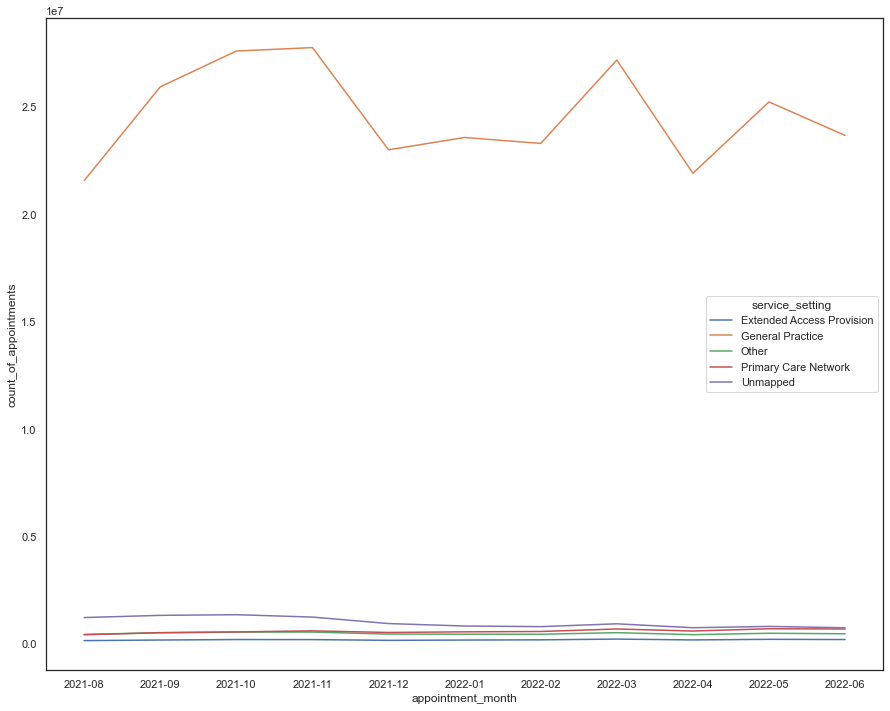

In [32]:
# Plot the appointments over the available date range, and review the service settings for months.
# Create a lineplot.
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='service_setting', data=nc_ss, ci=None)

**Context types:**

In [33]:
# Create a separate data set that can be used in future weeks. 
nc_ct = nc.groupby(by=['appointment_month', 'context_type']) \
          .sum() \
          .reset_index()

# View output.
nc_ct

,appointment_month,context_type,count_of_appointments,month
0,2021-08,Care Related Encounter,20255235,476832
1,2021-08,Inconsistent Mapping,2363093,62936
2,2021-08,Unmapped,1233843,20224
3,2021-09,Care Related Encounter,24404251,574470
4,2021-09,Inconsistent Mapping,2782135,75744
5,2021-09,Unmapped,1336115,24084
6,2021-10,Care Related Encounter,26125201,629370
7,2021-10,Inconsistent Mapping,2811977,84320
8,2021-10,Unmapped,1366656,27090
9,2021-11,Care Related Encounter,26282778,730972


<AxesSubplot:xlabel='appointment_month', ylabel='count_of_appointments'>

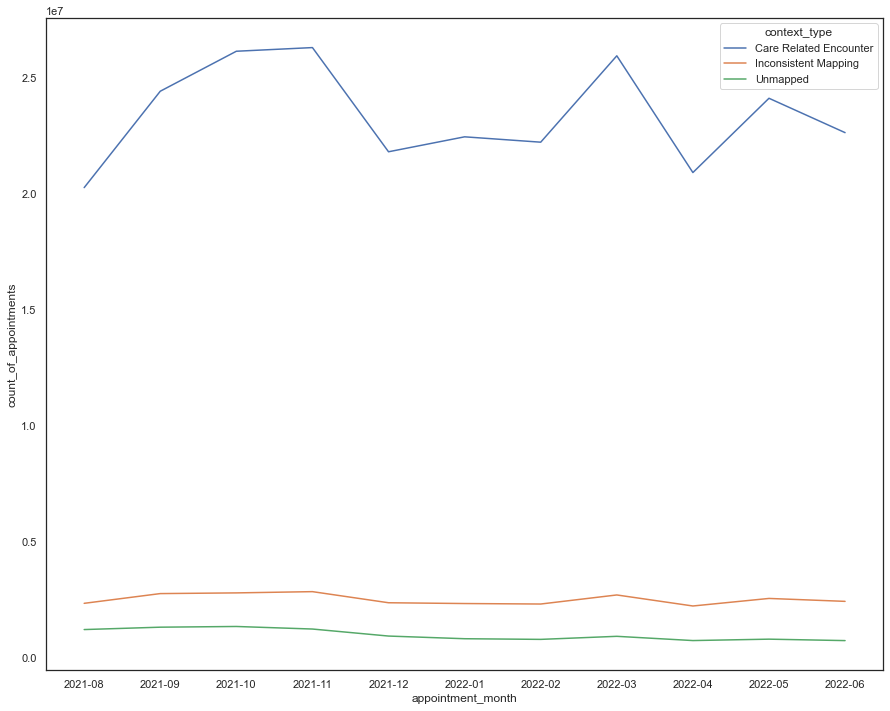

In [34]:
# Plot the appointments over the available date range, and review the context types for months.
# Create a lineplot.
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='context_type', data=nc_ct,ci=None)

**National categories:**

In [35]:
# Create a separate data set that can be used in future weeks. 
nc_nc = nc.groupby(by=['appointment_month', 'national_category']) \
          .sum() \
          .reset_index()

# View output.
nc_nc

,appointment_month,national_category,count_of_appointments,month
0,2021-08,Care Home Needs Assessment & Personalised Care...,29676,16112
1,2021-08,Care Home Visit,47583,17792
2,2021-08,Clinical Triage,3704207,51384
3,2021-08,General Consultation Acute,4280920,59384
4,2021-08,General Consultation Routine,7756045,62816
...,...,...,...,...
193,2022-06,Social Prescribing Service,55066,15984
194,2022-06,Structured Medication Review,187800,25008
195,2022-06,Unmapped,758640,13614
196,2022-06,Unplanned Clinical Activity,274491,21204


<AxesSubplot:xlabel='appointment_month', ylabel='count_of_appointments'>

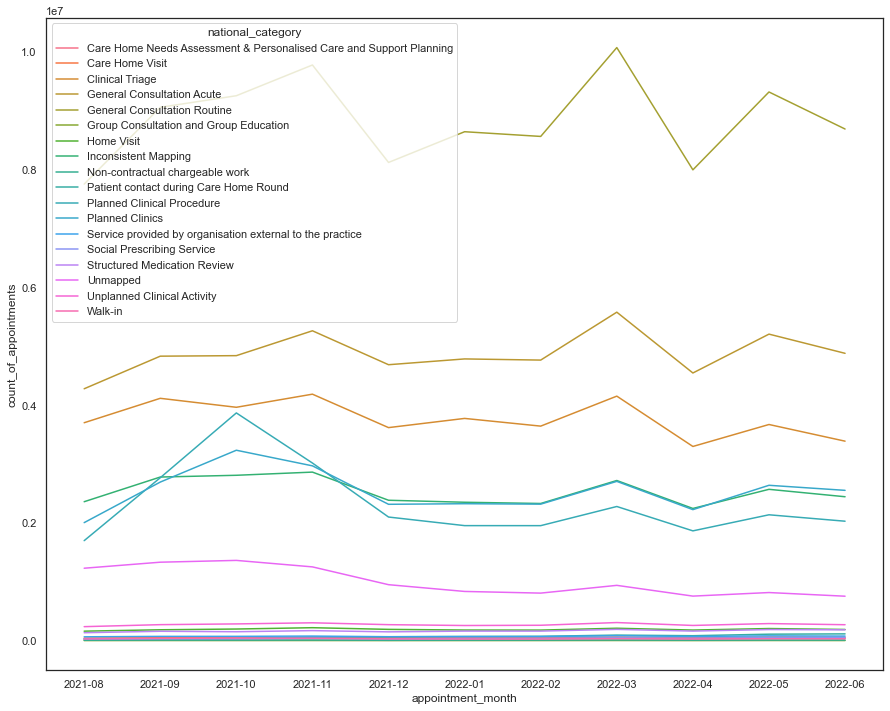

In [36]:
# Plot the appointments over the available date range, and review the national categories for months.
# Create a lineplot.
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='national_category', data=nc_nc,ci=None)

### Objective 2
Create four visualisations indicating the number of appointments for service setting per season. The seasons are summer (August 2021), autumn (October 2021), winter (January 2022), and spring (April 2022).

**Summer (August 2021):**

In [37]:
# Create a separate data set that can be used in future weeks. 
nc_ss_day = nc.groupby(by=['service_setting', 'appointment_month']).sum().reset_index()

# View output.
nc_ss_day

,service_setting,appointment_month,count_of_appointments,month
0,Extended Access Provision,2021-08,160927,72184
1,Extended Access Provision,2021-09,187906,87363
2,Extended Access Provision,2021-10,209539,96530
3,Extended Access Provision,2021-11,207577,111980
4,Extended Access Provision,2021-12,173504,113376
5,Extended Access Provision,2022-01,186375,9540
6,Extended Access Provision,2022-02,196627,19504
7,Extended Access Provision,2022-03,231905,33426
8,Extended Access Provision,2022-04,192284,37420
9,Extended Access Provision,2022-05,220511,51790


<AxesSubplot:xlabel='service_setting', ylabel='count_of_appointments'>

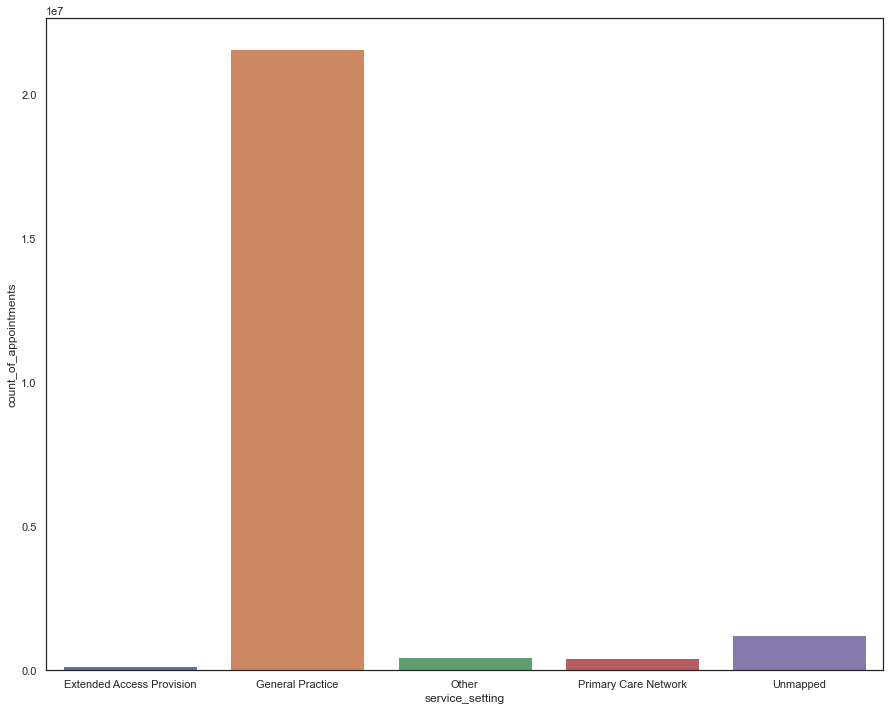

In [38]:
# Look at August 2021 in more detail to allow a closer look.
# Bar plot 
sns.barplot(x='service_setting', 
            y='count_of_appointments',
            data=nc_ss_day[nc_ss_day['appointment_month'] == '2021-08'])

**Autumn (October 2021):**

<AxesSubplot:xlabel='service_setting', ylabel='count_of_appointments'>

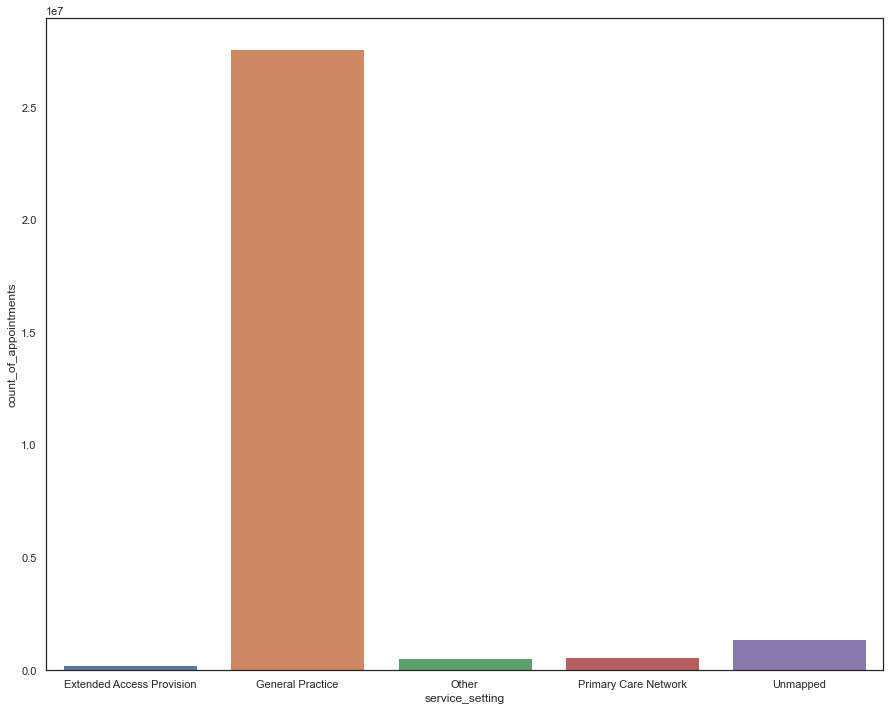

In [39]:
# Look at October 2021 in more detail to allow a closer look.
sns.barplot(x='service_setting', 
            y='count_of_appointments',
            data=nc_ss_day[nc_ss_day['appointment_month'] == '2021-10'])

**Winter (January 2022):**

<AxesSubplot:xlabel='service_setting', ylabel='count_of_appointments'>

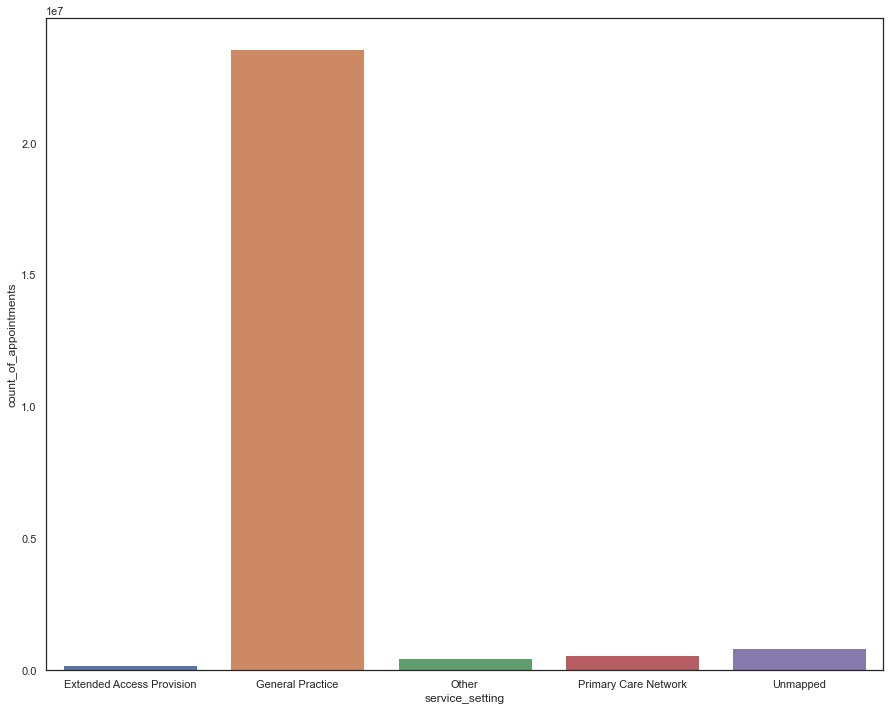

In [40]:
# Look at January 2022 in more detail to allow a closer look.
# Bar plot 
sns.barplot(x='service_setting', 
            y='count_of_appointments',
            data=nc_ss_day[nc_ss_day['appointment_month'] == '2022-01'])

**Spring (April 2022):**

<AxesSubplot:xlabel='service_setting', ylabel='count_of_appointments'>

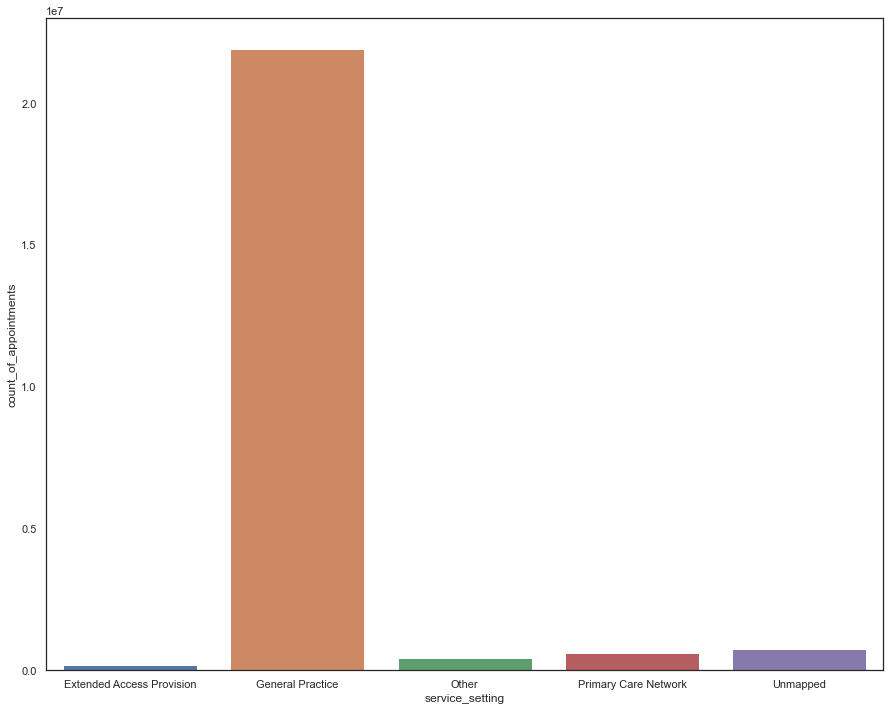

In [41]:
# Look at April 2022 in more detail to allow a closer look.
# Create a lineplot.
sns.barplot(x='service_setting', 
            y='count_of_appointments',
            data=nc_ss_day[nc_ss_day['appointment_month'] == '2022-04'])

# 

# Assignment activity 5

### Analyse tweets from Twitter with hashtags related to healthcare in the UK.

In [42]:
# Libraries and settings needed for analysis
import pandas as pd
import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

In [43]:
# Load the data set.
twt_df = pd.read_csv('tweets.csv')

# View the DataFrame.
twt_df

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",5,0,False,False,en
4,1567582720460570625,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
...,...,...,...,...,...,...,...,...,...,...
1169,1567583004209332227,RT @PotomacPhotonic: Potomac #Innovation Report: #precisionFabrication techniques Optimize #Microfluidic Mixing of Viscous Fluids \n\n#manuf…,"{'hashtags': [{'text': 'Innovation', 'indices': [29, 40]}, {'text': 'precisionFabrication', 'indices': [50, 71]}, {'text': 'Microfluidic', 'indices': [92, 105]}], 'symbols': [], 'user_mentions': [...","#Innovation, #precisionFabrication, #Microfluidic","{'iso_language_code': 'en', 'result_type': 'recent'}",1,0,False,False,en
1170,1567582945342267393,"Not a cent towards workers who would like to advance their training, especially those already employed by SHA or who for various reasons cannot obtain a student loan. Half of our department applie...","{'hashtags': [{'text': 'SKPoli', 'indices': [232, 239]}, {'text': 'healthcare', 'indices': [240, 251]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/33f7Dz5FrU', 'expanded_u...","#SKPoli, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,1,False,False,en
1171,1567582936014241792,"The @hfmaorg Region 9 presents ""The Value of ESG to the Healthcare Industry"" and our own Kris Russell and Ron Present will be the key speakers. This #webinar will be taking place 9/13 and will exp...","{'hashtags': [{'text': 'webinar', 'indices': [149, 157]}, {'text': 'ESG', 'indices'

In [44]:
# Explore the metadata.
print(f'Dimensions (rows, columns) : {twt_df.shape}')
print('\n')
print(f'dtype information:')
print(twt_df.dtypes)
print('\n')

Dimensions (rows, columns) : (1174, 10)


dtype information:
tweet_id                    int64
tweet_full_text            object
tweet_entities             object
tweet_entities_hashtags    object
tweet_metadata             object
tweet_retweet_count         int64
tweet_favorite_count        int64
tweet_favorited              bool
tweet_retweeted              bool
tweet_lang                 object
dtype: object




In [45]:
# Explore the data set.
print(f'Information:')
print(twt_df.info())
print(f'Describe:')
print(twt_df.describe())

Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB
None
Describe:
           tweet_id  tweet_retweet_count  tweet_favorite_count
count  1.174000e+03          1174.000000            1174.00000
mean   1.567612e+18             8.629472   

In [46]:
# Would it be useful to only look at retweeted and favourite tweet messages?
print(twt_df[twt_df['tweet_favorited'] == True])

print(twt_df[twt_df['tweet_retweeted'] == True])

Empty DataFrame
Columns: [tweet_id, tweet_full_text, tweet_entities, tweet_entities_hashtags, tweet_metadata, tweet_retweet_count, tweet_favorite_count, tweet_favorited, tweet_retweeted, tweet_lang]
Index: []
Empty DataFrame
Columns: [tweet_id, tweet_full_text, tweet_entities, tweet_entities_hashtags, tweet_metadata, tweet_retweet_count, tweet_favorite_count, tweet_favorited, tweet_retweeted, tweet_lang]
Index: []


In [47]:
# Create a new DataFrame containing only the text.
twt_txt_df = pd.DataFrame(twt_df['tweet_full_text']).reset_index(drop=True)

# View the DataFrame.
twt_txt_df

,tweet_full_text
0,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be..."
1,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…
2,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…
3,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…
4,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di..."
...,...
1169,RT @PotomacPhotonic: Potomac #Innovation Report: #precisionFabrication techniques Optimize #Microfluidic Mixing of Viscous Fluids \n\n#manuf…
1170,"Not a cent towards workers who would like to advance their training, especially those already employed by SHA or who for various reasons cannot obtain a student loan. Half of our department applie..."
1171,"The @hfmaorg Region 9 presents ""The Value of ESG to the Healthcare Industry"" and our own Kris Russell and Ron Present will be the key speakers. This #webinar will be taking place 9/13 and will exp..."
1172,Happy physiotherapy 🩺 day 🎉..\n#bpt #physiotherapy \n#HealthyNation #healthcare \n#medicalcare \n#csjmu .\n@WHO \n@MoHFW_INDIA \n@nitish_0210 https://t.co/NQHdIoYymC


In [67]:
# Loop through the messages, and create a list of values containing the # symbol.
tags = []
for y in [x.split(' ') for x in twt_txt_df['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            tags.append(z.lower().strip(','))

In [68]:
# Display the first 30 records.
tags = pd.Series(tags)
tags.value_counts().head(30)

#healthcare                    726
#health                         80
#ai                             41
#medicine                       41
#job                            38
#medical                        35
#strategy                       30
#pharmaceutical                 28
#digitalhealth                  25
#pharma                         25
#marketing                      25
#medtwitter                     24
#competitiveintelligence        24
#biotech                        24
#meded                          23
#hiring                         18
#vaccine                        18
#machinelearning                17
#news                           17
#technology                     17
#coronavirus                    16
#competitivemarketing           16
#covid                          16
#womeninmedicine                16
#wellness                       15
#healthtech                     15
#medicare                       14
#doctorofveterinarymedicine     14
#telemedicine       

In [69]:
# Convert the series to a DataFrame in preparation for visualisation.
tags_df = pd.DataFrame(tags.value_counts()).reset_index()

# Rename the columns.
tags_df.columns = ['word', 'count']
tags_df

,word,count
0,#healthcare,726
1,#health,80
2,#ai,41
3,#medicine,41
4,#job,38
...,...,...
1739,#philanthropy,1
1740,\n#fundraising,1
1741,#bestself,1
1742,#bettermessage,1


In [70]:
# Fix the count datatype.
tags_df['count'] = tags_df['count'].values.astype(int)

# View the result.
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1744 entries, 0 to 1743
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    1744 non-null   object
 1   count   1744 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 27.4+ KB


In [71]:
# Display records where the count is larger than 10.
tags_df[tags_df['count'] > 10]

,word,count
0,#healthcare,726
1,#health,80
2,#ai,41
3,#medicine,41
4,#job,38
5,#medical,35
6,#strategy,30
7,#pharmaceutical,28
8,#digitalhealth,25
9,#pharma,25


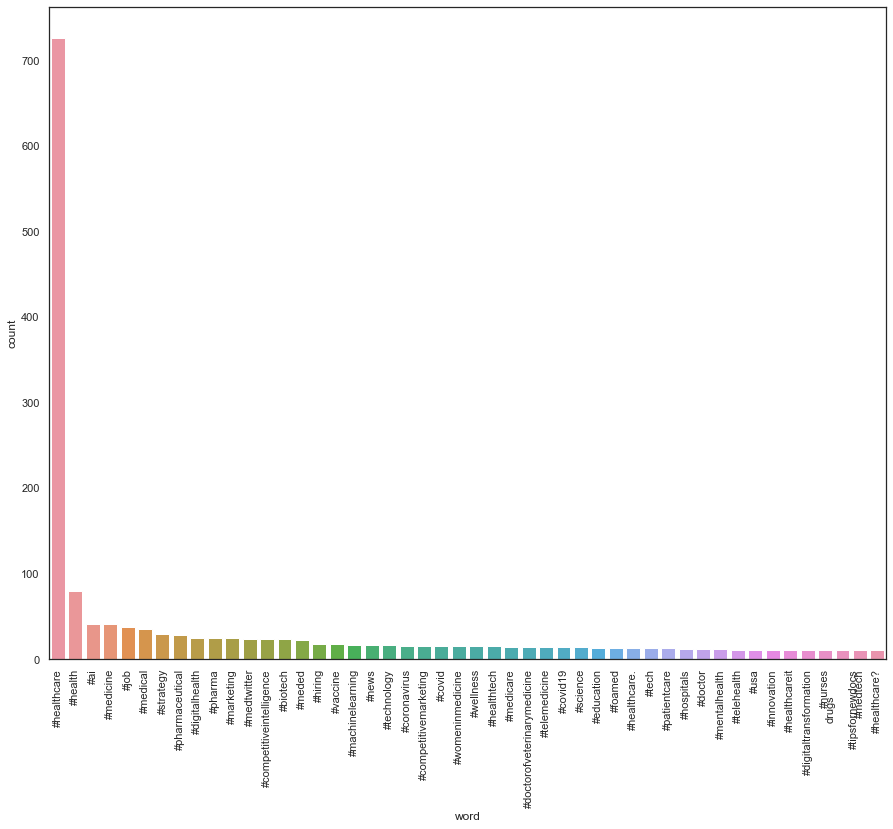

In [72]:
# Create a Seaborn barplot indicating records with a count >10 records.

twt_plot = sns.barplot(x='word',
                       y='count',
                       data=tags_df[tags_df['count'] > 10])
words = [x.get_text() for x in twt_plot.get_xticklabels()]
# Assignong to variable will prevent displaying tick values before graph.
_ = twt_plot.set_xticklabels(labels=words, rotation=90)

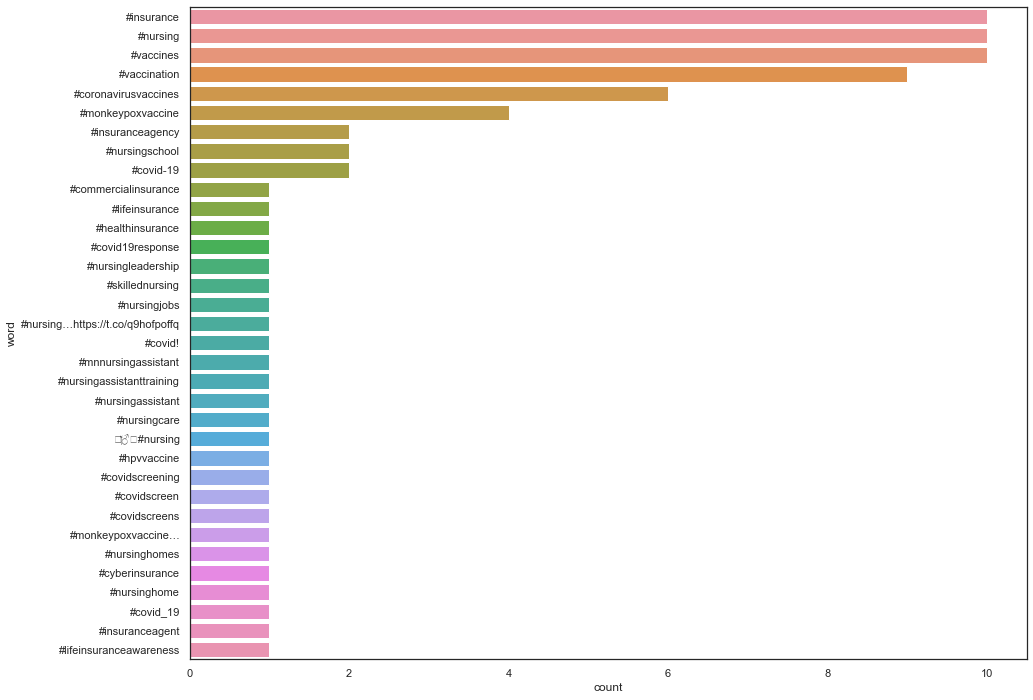

In [121]:
# Create the plot.
# Tags with count <= 10.
tags_usage = tags_df[tags_df['count'] <= 10]
# Create keywords.
keywords = ['insurance', 'nursing', 'covid', 'vaccination', 'vaccine']
# Filter rows containig keywords.
filtered_tags = tags_usage[tags_usage['word'].str.contains('|'.join(keywords))]
# Filter rows which doesn't have new line in tags.
filtered_tags = filtered_tags[~filtered_tags['word'].str.contains('\n')]
# View the barplot.


filtered_tags_plot = sns.barplot(x='count',
                                 y='word',
                                 data=filtered_tags)

# 

# Assignment activity 6

### Investigate the main cencerns posed by the NHS. 

In [125]:
# Prepare your workstation.
# Load the appointments_regional.csv file.
ar = pd.read_csv('appointments_regional.csv')

# View the DataFrame.
ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [129]:
# Print the min and max dates.
print(ar.info())

print(f'Minimum appointment_month: {ar["appointment_month"].min()}')
print(f'Maximum appointment_month: {ar["appointment_month"].max()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB
None
Minimum appointment_month: 2020-01
Maximum appointment_month: 2022-06


In [133]:
# Filter the data set to only look at data from 2021-08 onwards.
ar[ar['appointment_month'] == '2021-08']

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
3652,E54000034,2021-08,Attended,GP,Face-to-Face,1 Day,6553
3653,E54000034,2021-08,Attended,GP,Face-to-Face,15 to 21 Days,2390
3654,E54000034,2021-08,Attended,GP,Face-to-Face,2 to 7 Days,10547
3655,E54000034,2021-08,Attended,GP,Face-to-Face,22 to 28 Days,937
3656,E54000034,2021-08,Attended,GP,Face-to-Face,8 to 14 Days,4961
...,...,...,...,...,...,...,...
595037,E54000050,2021-08,Unknown,Unknown,Unknown,22 to 28 Days,2
595038,E54000050,2021-08,Unknown,Unknown,Unknown,8 to 14 Days,9
595039,E54000050,2021-08,Unknown,Unknown,Unknown,More than 28 Days,7
595040,E54000050,2021-08,Unknown,Unknown,Unknown,Same Day,6


**Question 1:** Should the NHS start looking at increasing staff levels? 

In [135]:
# Create an aggregated data set to review the different features.
ar_agg = ar.filter(['appointment_month', 'hcp_type', 'appointment_status',
                   'appointment_mode', 'time_between_book_and_appointment'], axis=1)

# View the DataFrame.
ar_agg

,appointment_month,hcp_type,appointment_status,appointment_mode,time_between_book_and_appointment
0,2020-01,GP,Attended,Face-to-Face,1 Day
1,2020-01,GP,Attended,Face-to-Face,15 to 21 Days
2,2020-01,GP,Attended,Face-to-Face,2 to 7 Days
3,2020-01,GP,Attended,Face-to-Face,22 to 28 Days
4,2020-01,GP,Attended,Face-to-Face,8 to 14 Days
...,...,...,...,...,...
596816,2022-06,Unknown,Unknown,Unknown,2 to 7 Days
596817,2022-06,Unknown,Unknown,Unknown,22 to 28 Days
596818,2022-06,Unknown,Unknown,Unknown,8 to 14 Days
596819,2022-06,Unknown,Unknown,Unknown,More than 28 Days


In [186]:
# Determine the total number of appointments per month.
appt_count = ar_agg.groupby('appointment_month')['appointment_month'].count().reset_index(name='count')
appt_count = appt_count.filter(['appointment_month', 'count'])

#appt_count.reset_index(inplace=True, drop=True)
# Add a new column to indicate the average utilisation of services.
# Monthly aggregate / 30 to get to a daily value.
# Round to one decimal
appt_count['average'] = (appt_count['count'] / 30).round(decimals = 1)


# View the DataFrame.
appt_count

,appointment_month,count,average
0,2020-01,20889,696.3
1,2020-02,20689,689.6
2,2020-03,21350,711.7
3,2020-04,19124,637.5
4,2020-05,18338,611.3
5,2020-06,18844,628.1
6,2020-07,19502,650.1
7,2020-08,19247,641.6
8,2020-09,20043,668.1
9,2020-10,20122,670.7


In [ ]:
# Create a new DataFrame consisting of the month of appointment and the number of appointments.
nc_appointment_df = pd.Dataframe()
# View the DataFrame.


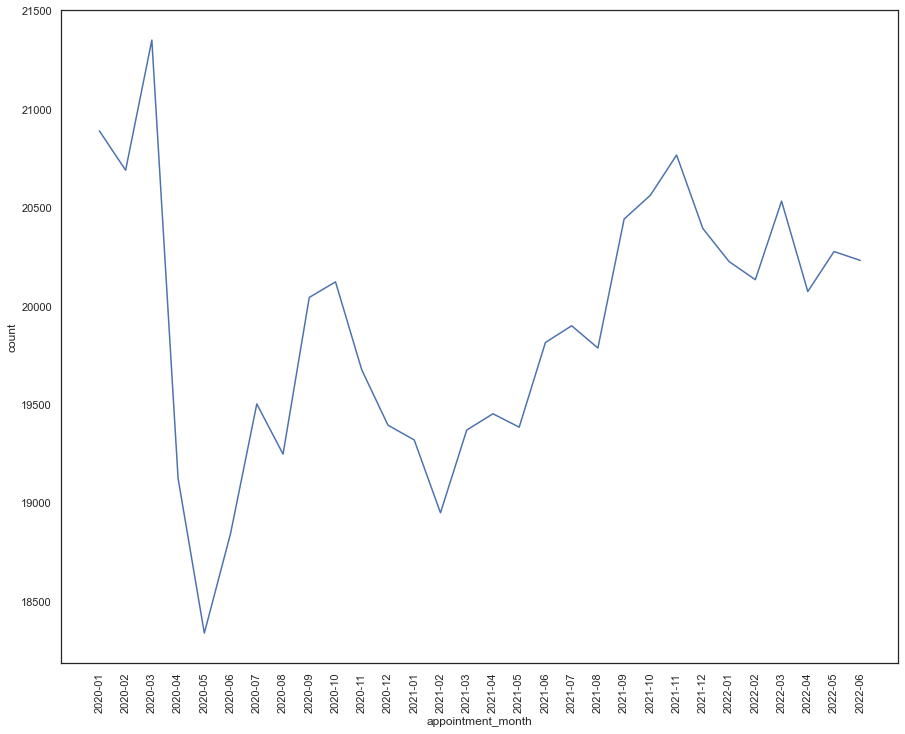

In [211]:
# Plot sum of count of monthly visits.
# Convert the appointment_month to string data type for ease of visualisation.
appt_count["appointment_month"] = appt_count["appointment_month"].values.astype(
    str)

# Create a lineplot with Seaborn.
words = appt_count['appointment_month'].values
appt_sum_plot = sns.lineplot(x='appointment_month', y='count',
                             data=appt_count, ci=None)
# appt_sum_plot.get_xticklabels()
# Assignong to variable will prevent displaying tick values before graph.
_ = appt_sum_plot.set_xticklabels(labels=words, rotation=90)

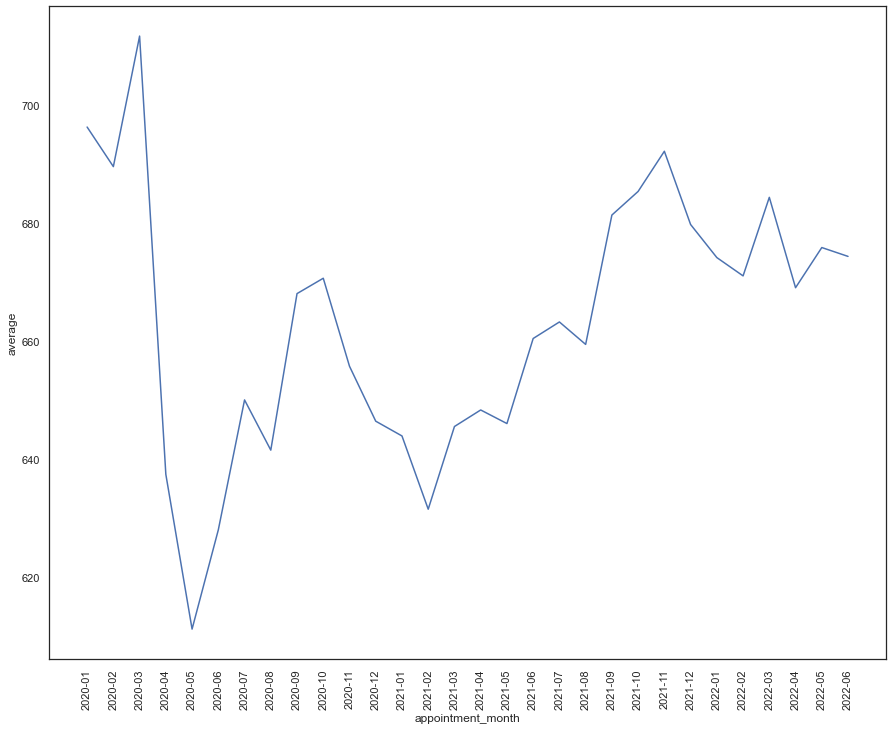

In [212]:
# Plot monthly capacity utilisation.
# Create a lineplot with Seaborn.
words = appt_count['appointment_month'].values
appt_sum_plot = sns.lineplot(x='appointment_month', y='average',
                             data=appt_count, ci=None)

# Assignong to variable will prevent displaying tick values before graph.
_ = appt_sum_plot.set_xticklabels(labels=words, rotation=90)


**Question 2:** How do the healthcare professional types differ over time?

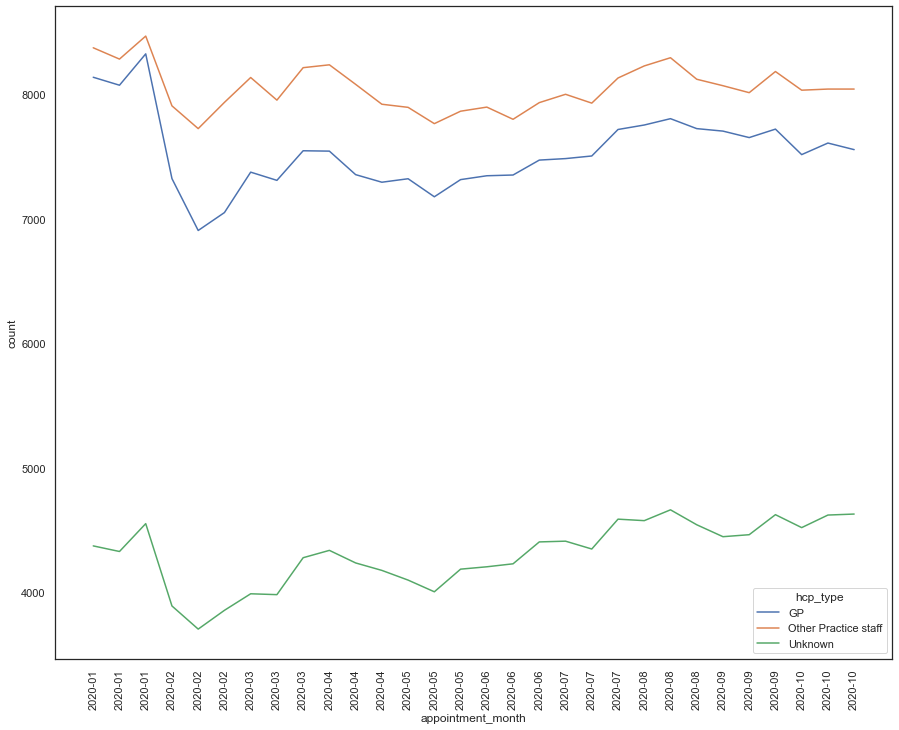

In [361]:
# Create a line plot to answer the question.
hcp_type = ar_agg.groupby(['appointment_month', 'hcp_type'])[
    'appointment_month'].count().reset_index(name='count')
hcp_type_plot = sns.lineplot(
    x='appointment_month', y='count', hue='hcp_type', data=hcp_type, ci=None)
words = hcp_type['appointment_month'].values
# Assignong to variable will prevent displaying tick values before graph.
_ = hcp_type_plot.set_xticklabels(labels=words, rotation=90)

**Question 3:** Are there significant changes in whether or not visits are attended?

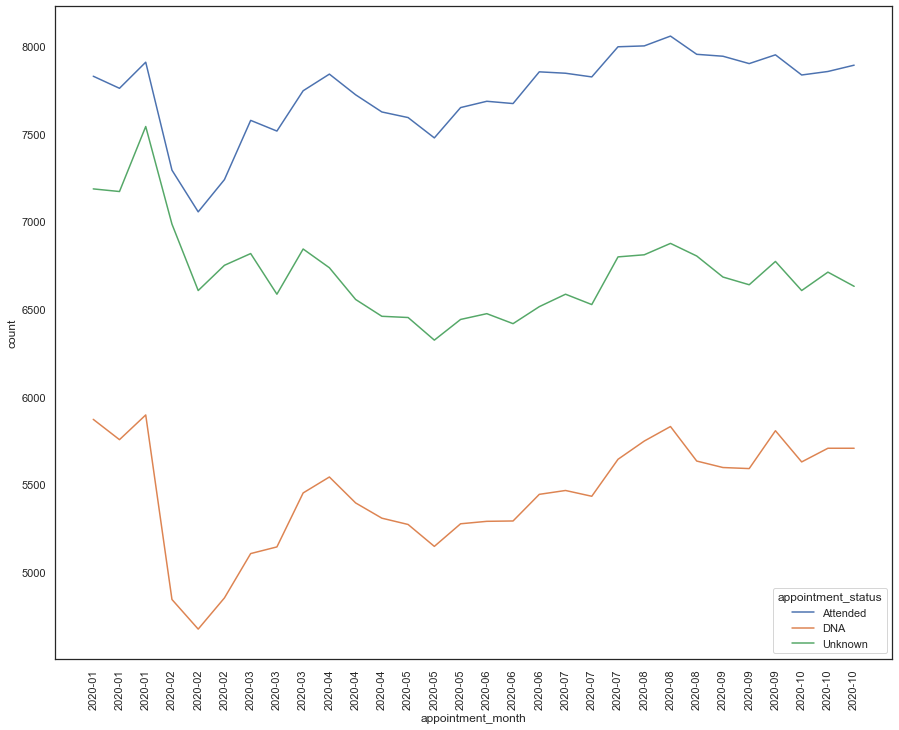

In [219]:
# Create a line plot to answer the question.
appointment_status = ar_agg.groupby(['appointment_month', 'appointment_status'])[
    'appointment_month'].count().reset_index(name='count')

appointment_status_plot = sns.lineplot(
    x='appointment_month', y='count', hue='appointment_status', data=appointment_status, ci=None)

words = appointment_status['appointment_month'].values
# Assignong to variable will prevent displaying tick values before graph.
_ = appointment_status_plot.set_xticklabels(labels=words, rotation=90)

**Question 4:** Are there changes in terms of appointment type and the busiest months?

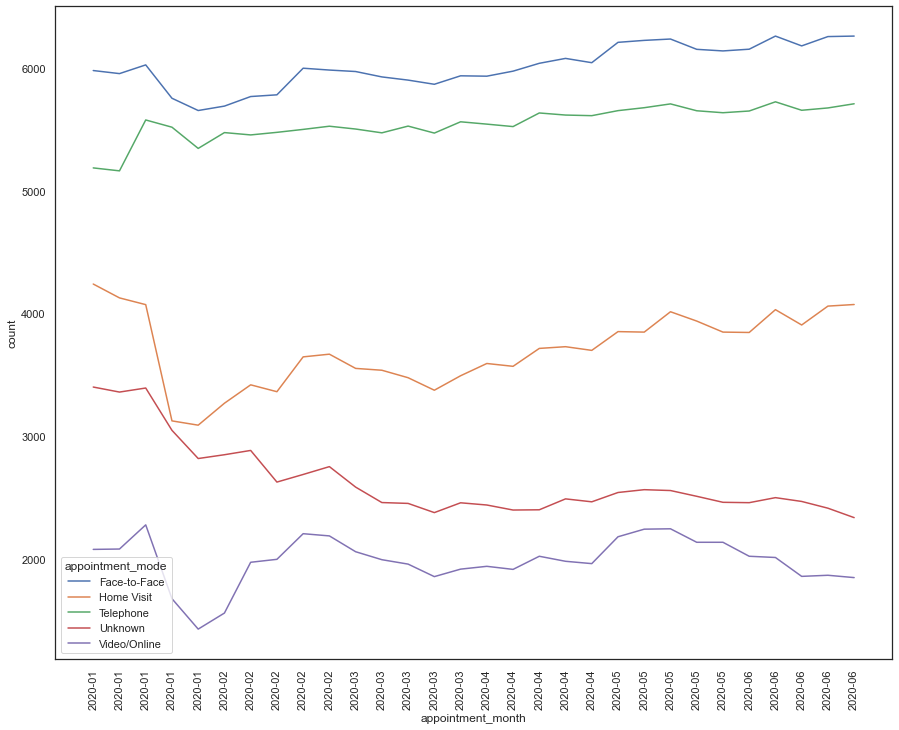

In [365]:
# Create a line plot to answer the question.
appointment_mode = ar_agg.groupby(['appointment_month', 'appointment_mode'])[
    'appointment_month'].count().reset_index(name='count')

appointment_mode_plot = sns.lineplot(
    x='appointment_month', y='count', hue='appointment_mode', data=appointment_mode, ci=None)

words = appointment_mode['appointment_month'].values
# Assignong to variable will prevent displaying tick values before graph.
_ = appointment_mode_plot.set_xticklabels(labels=words, rotation=90)

**Question 5:** Are there any trends in time between booking an appointment?

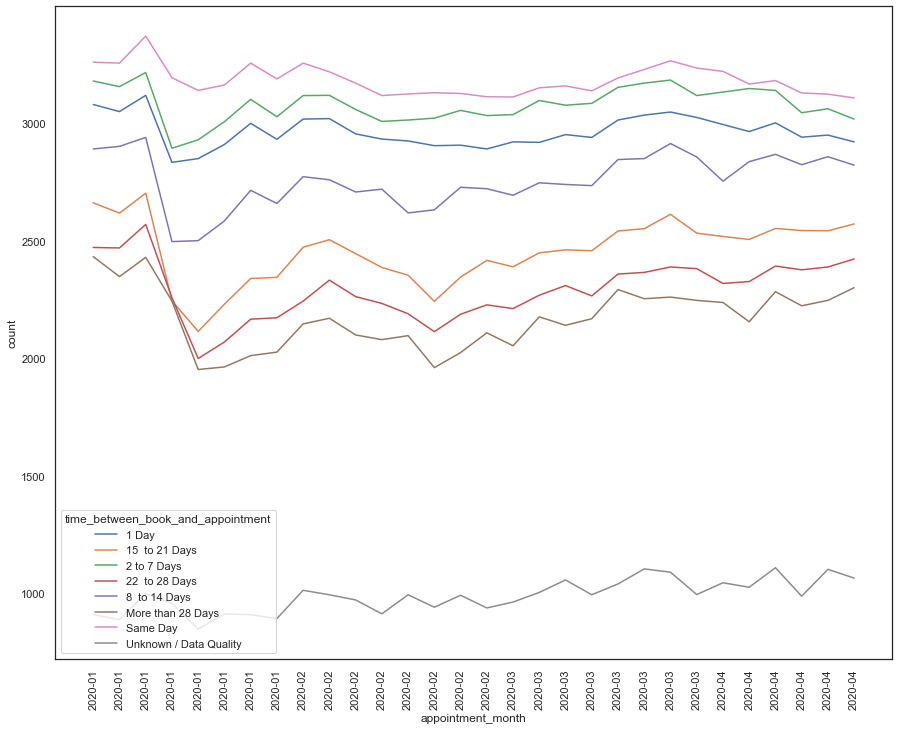

In [227]:
# Create a line plot to answer the question.
appointment_duration = ar_agg.groupby(['appointment_month', 'time_between_book_and_appointment'])[
    'appointment_month'].count().reset_index(name='count')

appointment_duration_plot = sns.lineplot(
    x='appointment_month', y='count', hue='time_between_book_and_appointment', data=appointment_duration, ci=None)

words = appointment_duration['appointment_month'].values
# Assignong to variable will prevent displaying tick values before graph.
_ = appointment_duration_plot.set_xticklabels(labels=words, rotation=90)

**Question 6:** How do the spread of service settings compare?

In [231]:
# Let's go back to the national category DataFrame you created in an earlier assignment activity.
print(nc.dtypes)
print(nc.shape)

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
month                             int64
dtype: object
(817394, 9)


<AxesSubplot:xlabel='appointment_month', ylabel='count_of_appointments'>

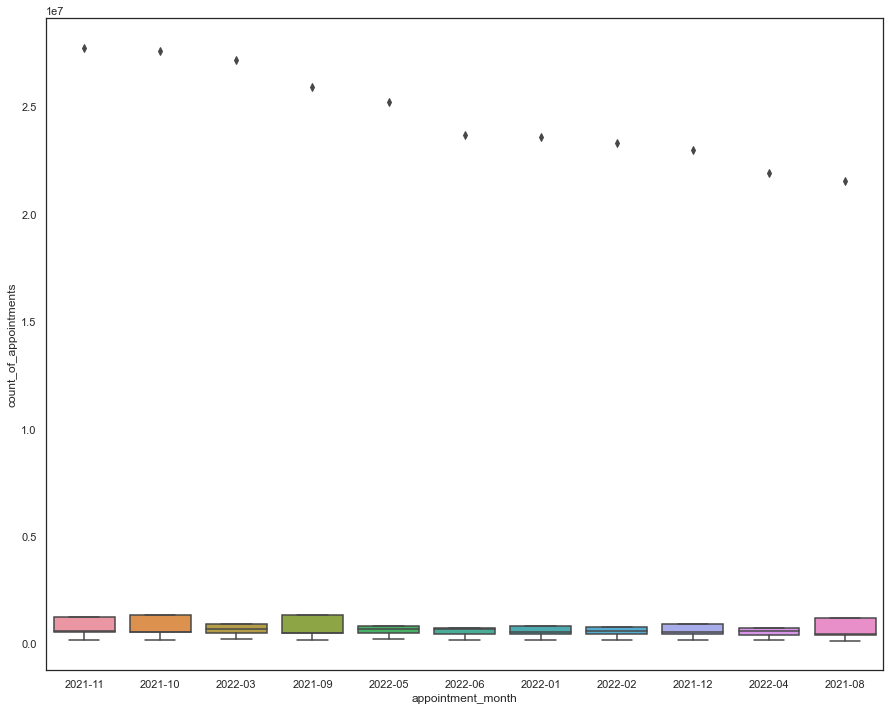

In [353]:
# Create a boxplot to investigate spread of service settings.

nc_appt_df = nc.filter(['appointment_month', 'service_setting', 'count_of_appointments']) \
               .groupby(by=['appointment_month', 'service_setting'], as_index=False) \
               .sum() \
               .sort_values(by=['count_of_appointments'], ascending=False)
nc_appt_df.reset_index(drop=True)

my_order = nc_appt_df.groupby(by=['appointment_month'])[
    'count_of_appointments'].median().iloc[::-1].index
sns.boxplot(x='appointment_month', y='count_of_appointments', data=nc_appt_df)

<AxesSubplot:xlabel='appointment_month', ylabel='count_of_appointments'>

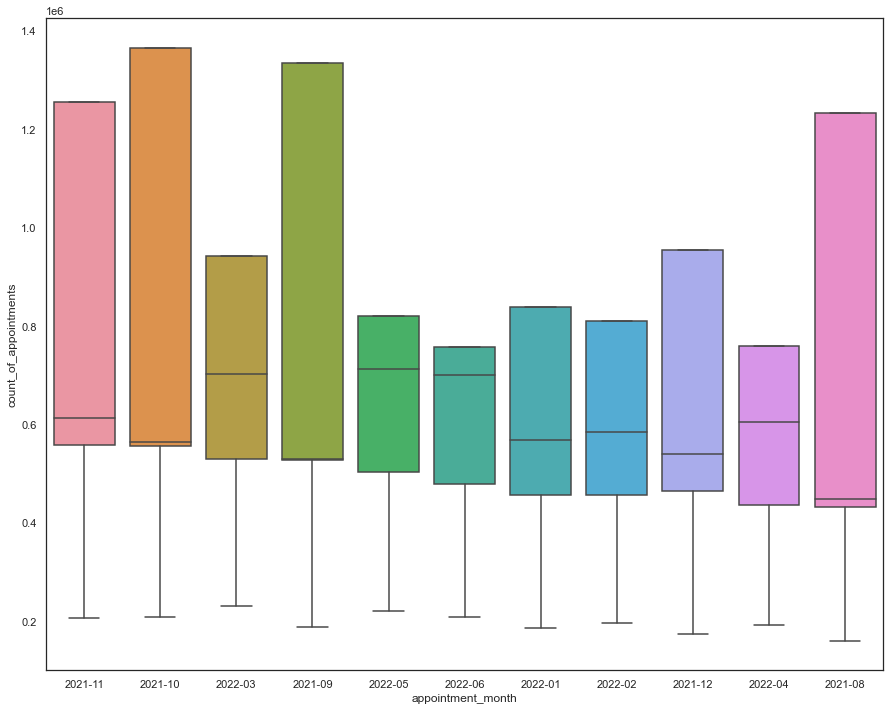

In [355]:
sns.boxplot(x='appointment_month', y='count_of_appointments', data=nc_appt_df, showfliers=False)

<AxesSubplot:xlabel='appointment_month', ylabel='count_of_appointments'>

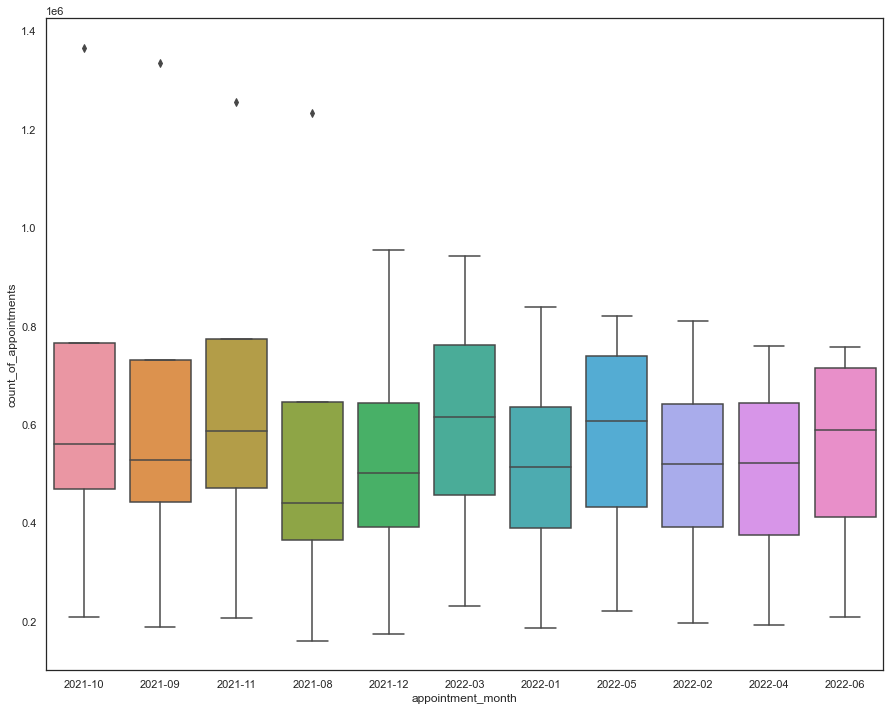

In [351]:
# Create a boxplot to investigate the service settings without GP.
nc_appt_ignore_gp = nc_appt_df[nc_appt_df['service_setting'] != 'General Practice']

sns.boxplot(x='appointment_month', y='count_of_appointments', data=nc_appt_ignore_gp)

<AxesSubplot:xlabel='appointment_month', ylabel='count_of_appointments'>

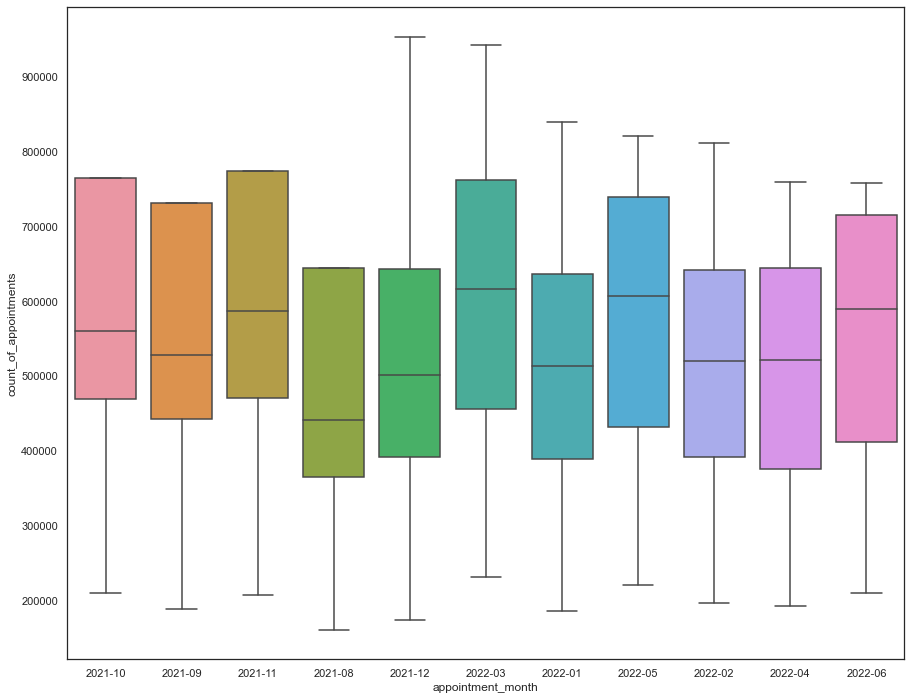

In [357]:
sns.boxplot(x='appointment_month', y='count_of_appointments', data=nc_appt_ignore_gp, showfliers=False)

# 

### Provide a summary of your findings and recommendations based on the analysis.

> Double click to insert your summary.